# HWDP

$ x = \frac{\sqrt{z}}{y} $

In [4]:
pip install numpy tqdm matplotlib


  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.0.0-cp39-cp39-win_amd64.whl (3.2 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\piotr\projekty\chess\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

ModuleNotFoundError: No module named 'pandas'

In [2]:
db= pd.read_csv(r'E:\bigdata\filtered_data_300600.csv')

In [3]:
db.head()

,Unnamed: 0,Result,WhiteElo,BlackElo,TimeControl,Game
0,0,0-1,1888,1796,300+0,1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...
1,1,0-1,1090,1156,600+0,1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... c5 ...
2,2,1-0,1428,1358,600+0,1. d4 { [%eval 0.25] [%clk 0:10:00] } 1... d5 ...
3,3,1-0,1926,1909,600+0,1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... e5 ...
4,4,0-1,1312,1296,300+0,1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...


In [4]:
db.describe()

,Unnamed: 0,WhiteElo,BlackElo
count,473207.000000,473207.000000,473207.000000
mean,236603.000000,1478.040471,1478.561925
std,136603.238754,310.822899,310.862666
min,0.000000,800.000000,766.000000
25%,118301.500000,1247.000000,1247.000000
50%,236603.000000,1477.000000,1476.000000
75%,354904.500000,1697.000000,1697.000000
max,473206.000000,2624.000000,2655.000000


In [5]:
# domyślnie bez [:5]
a = db.Game
# a.to_csv('file.csv', encoding='utf-8')
a
# TODO: find good, bad moves in notation
# https://en.wikipedia.org/wiki/Chess_annotation_symbols

0         1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...
1         1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... c5 ...
2         1. d4 { [%eval 0.25] [%clk 0:10:00] } 1... d5 ...
3         1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... e5 ...
4         1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...
                                ...                        
473202    1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e6 ...
473203    1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... d5 ...
473204    1. f4 { [%eval -0.1] [%clk 0:10:00] } 1... e6 ...
473205    1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... c6 ...
473206    1. e4 { [%eval 0.24] [%clk 0:05:00] } 1... e5 ...
Name: Game, Length: 473207, dtype: object

In [6]:
def time_to_sec(hhmmss):
    return sum(x * int(t) for x, t in zip([3600, 60, 1], hhmmss.split(":")))

def derivative(value_list, step=1, reversed=False):
    v_copy = [it for it in value_list]
    for i in range(len(v_copy)-1, -1, -1):
        if i in np.arange(step):
            v_copy[i] = 0
        if i >= step:
            try:
                v_copy[i] = round(v_copy[i] - v_copy[i-step], 2)
            except TypeError:
                pass
    if reversed:
        v_copy = [-1 * it for it in v_copy]
    return v_copy

def score_name(string: str) -> str:
    if '??' in string:
        return 'blunder'
    elif '?!' in string:
        return 'dubious move'
    elif '!?' in string:
        return 'interesting move'
    elif '!!' in string:
        return 'brilliant move'
    elif '?' in string:
        return 'mistake'
    elif '!' in string:
        return 'good move'
    else:
        return '0'

In [7]:
# na razie na a[0] -> zrobić fora dla wszystkich
# ev = re.findall(r"\%eval (.*?)\]",a[0])
# ev = [float(it) for it in ev]
#
# t_left = re.findall(r"\%clk (.*?)\]",a[0])
# t_left = [time_to_sec(it) for it in t_left]
#
# d_t = derivative(t_left, step=2, reversed=True)
# d_ev = [round(it,2) for it in derivative(ev, step=1, reversed=False)]
# ev
all_ev = []
all_d_ev = []
all_t_left = []
all_d_t = []
score = []

for j in tqdm(range(len(a))):

    # score find
    sc = re.findall(r"\. (.*?)\] }",a[j])
    for i in range(len(sc)):
        sc[i] = score_name(sc[i])
    # eval find
    # ev = re.findall(r"\%eval (.*?)\]",a[j])
    # for i in range(len(ev)):
    #     try:
    #         ev[i] = round(float(ev[i]),2)
    #     except ValueError:
    #         pass
    score.append(sc)
    # all_ev.append(ev)
    # time find
    t_left = re.findall(r"\%clk (.*?)\]",a[j])
    t_left = [time_to_sec(it) for it in t_left]
    all_t_left.append(t_left)
    all_d_t.append(derivative(t_left, step=2, reversed=True))
    # all_d_ev.append(derivative(ev, step=1, reversed=False))


100%|██████████| 473207/473207 [04:05<00:00, 1926.81it/s]


In [8]:
# db['Eval'] = all_ev
# db['Eval_change'] = all_d_ev
db['Time'] = all_t_left
db['Time_change'] = all_d_t
db['Score'] = score

In [9]:
db.head(1)

,Unnamed: 0,Result,WhiteElo,BlackElo,TimeControl,Game,Time,Time_change,Score
0,0,0-1,1888,1796,300+0,1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...,"[300, 300, 298, 299, 297, 297, 296, 296, 289, ...","[0, 0, 2, 1, 1, 2, 1, 1, 7, 1, 2, 2, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dubiou..."


In [14]:
# TODO: zmienić: prawdopodobieństwo wykonania ruchu danego typu
# czyli zostawić nieblundery też, usunąć if it[0] != '0'
# dodać informacje o wyniku gry i kolorze osoby
# dodać numer ruchu
db_2 = db.iloc[116820+59175+5:,:]
moves = pd.DataFrame()
ID = 116820+59175
m = len(db)
for i in tqdm(range(100000)):
    zip_values = [ it for it in zip(db_2.iloc[i,-1],db_2.iloc[i,-2])] #  if it[0] != '0'
    n = len(zip_values)
    color = ['w','b'] * int(np.ceil(n/2))
    moves = pd.concat([moves,
                       pd.DataFrame(
                       {'game_ID': [ID] * n,
                        'score': [it[0] for it in zip_values],
                        'delta_time': [it[1] for it in zip_values],
                        'WhiteElo': [int(db_2.iloc[i,2])] * n,
                        'BlackElo': [int(db_2.iloc[i,3])] * n,
                        'TimeControl': [db_2.iloc[i,4]] * n,
                        'color': color[:n],
                        'move': [int(v) for v in ((np.arange(n, dtype='int') ) - (np.arange(n, dtype='int') )% 2 ) / 2 + 1],
                        'Result': [db_2.iloc[i,1]] * n
                        })]
                      ,ignore_index=True)
    ID+=1

100%|██████████| 100000/100000 [3:27:52<00:00,  8.02it/s] 


In [11]:
moves.to_csv(r'C:\Users\piotr\OneDrive\Documents\GitHub\Chess\dane\moves300600v3.csv', mode='w')

In [15]:
moves.to_csv(r'C:\Users\piotr\OneDrive\Documents\GitHub\Chess\dane\moves300600_noindexv3.csv', mode='w', index=False)

In [14]:
db.to_csv(r'C:\Users\piotr\OneDrive\Documents\GitHub\Chess\dane\filtered_data300600_wt_eval.csv', mode='w')

In [27]:
db.WhiteElo.quantile(.75)

1722.0

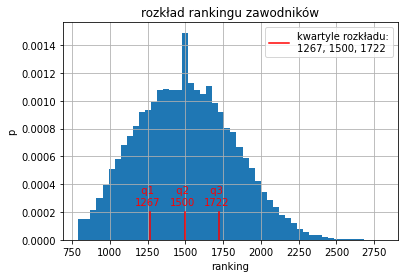

In [6]:
plt.figure()
db.WhiteElo.hist(bins=50, density=True)
# db.WhiteElo.plot(kind="kde")

plt.plot([db.WhiteElo.quantile(.25),db.WhiteElo.quantile(.25)],[0,0.0002], color='red')
plt.plot([db.WhiteElo.quantile(.5),db.WhiteElo.quantile(.5)],[0,0.0002], color='red')
plt.plot([db.WhiteElo.quantile(.75),db.WhiteElo.quantile(.75)],[0,0.0002], color='red')
plt.text(db.WhiteElo.quantile(.25)-100, 0.00025,'  q1\n1267',color='red')
plt.text(db.WhiteElo.quantile(.5)-100, 0.00025,'  q2\n1500',color='red')
plt.text(db.WhiteElo.quantile(.75)-100, 0.00025,'  q3\n1722',color='red')
plt.legend(['kwartyle rozkładu:\n1267, 1500, 1722'])
plt.title('rozkład rankingu zawodników')
plt.xlabel('ranking')
plt.ylabel('p')
plt.savefig('graph.svg')

<AxesSubplot:>

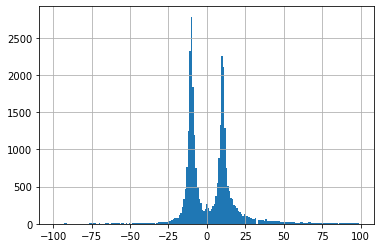

In [13]:
db.WhiteRatingDiff[(db.WhiteRatingDiff > -100) & (db.WhiteRatingDiff <100)].hist(bins=201)

<AxesSubplot:>

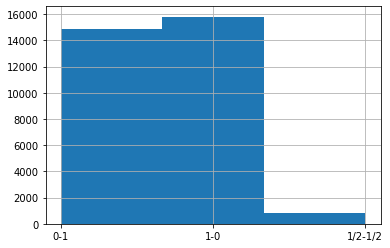

In [14]:
db.Result.hist(bins=3)

In [15]:
a = 'asd1 asd alsd ;asdf'
a.count('asd')

3

In [16]:
# 5+0 format
format_5 = db[db['TimeControl'] == '300+0']
for item in format_5.loc[:30,'Eval_change']:
    print(item)

[0, 0.25, -0.14, -0.08, 0.28, 0.01, -0.07, -0.07, 0.23, 0.19, -0.21, 0.06, -0.2, 0.62, 0.45, 0.1, -1.03, -0.03, -0.06, 0.09, -0.07, -0.02, -0.19, 0.46, 0.11, -0.07, -0.17, 0.04, -1.05, 0.45, -0.37, -0.17, -0.12, 0.97, -0.84, 0.04, -1.0, 0.18, -0.92, 0.21, -1.79, 0.19, -0.26, 0.07, 0.04, 0.07, -1.95, 1.17, -5.16, 0.0, 0.04, 0.03, 0.02, 0.05, 0.03, 0.2]
[0, 0.25, -0.14, -0.08, 0.06, 0.25, -0.1, 0.02, 0.1, -0.12, 0.02, 0.2, -0.04, -0.22, 0.28, 0.65, -0.59, 0.02, -0.38, 0.04, 0.03, -0.07, -0.51, 0.19, -0.39, 0.58, 0.06, 0.2, 0.12, 0.97, -0.1, 0.53, -1.95, 2.13, -2.04, 0.02, -0.11, 0.0, 0.0, -0.29, -1.71, 0.1, -2.57, 0.18, -6.71, 0.29, 0.88, 2.8, -0.42, 4.4, -57.74, 53.06, -5.38, 10.75, '#-12', '#-11', '#-11', '#-10', '#-6', '#-10', '#-10', -7.39, '#-7', '#-6', '#-2', '#-1', '#-1']


In [17]:
for item in format_5.loc[:30,'Time_change']:
    print(item)

[0, 0, 2, 1, 1, 2, 1, 1, 7, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 3, 7, 0, 3, 1, 10, 4, 9, 2, 20, 5, 7, 2, 51, 20, 7, 11, 47, 59, 50, 8, 22, 2, 0, 13, 13, 17, 7, 7, 7, 16, 5, 2, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 1, 3, 5, 5, 2, 8, 8, 0, 6, 18, 2, 0, 2, 5, 11, 0, 10, 4, 7, 16, 9, 2, 5, 7, 8, 5, 14, 3, 2, 4, 3, 7, 12, 15, 4, 2, 8, 13, 20, 4, 2, 2, 3, 46, 8, 7, 23, 2, 16, 7, 4, 16, 8, 4, 5, 6, 3, 3, 22, 2, 4, 3]


In [18]:
format_5.loc[:30,'Time_change']


1     [0, 0, 2, 1, 1, 2, 1, 1, 7, 1, 2, 2, 0, 1, 1, ...
20    [0, 0, 1, 1, 0, 1, 1, 3, 5, 5, 2, 8, 8, 0, 6, ...
Name: Time_change, dtype: object

In [4]:
a = db[db['TimeControl'].isin(['300+0','600+0'])]
a =